<h1>1. Regresión Lineal Ordinaria (LSS)</h1>

In [4]:
import numpy as np
import pandas as pd

a) Se elimina id, date y zipcode ya que no aportan informacion relevante en cuanto al precio de las casas

In [5]:
df = pd.read_csv("kc_house_data.csv")
df.drop(['id','date','zipcode',],axis=1,inplace=True)

b) El dataset consta de 18 columnas o atributos, las cuales presentan valores no nulos y enteros o reales, un total de 21.613 instancias de casas.
Todas las casas se encuentran localizadas en King County, esto se refleja en la media de la latitud y longitud (47.560053, -122.213896) y su baja desviasión estándar, la mayoria presenta entre 3 a 4 dormitorios y 1 a 2 baños, los demás datos presentan mayor dispersión por lo que no son muy útiles para generalizar.

In [6]:
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


c) Esta parte corresponde al preprocesamiento de los datos, y es utilizado cuando los datos tienen valores muy dispersos (en este caso casi todos exceptuando: 'bedrooms', 'bathrooms', 'lat', 'long'). La motivación detrás de esto radica en que algunos algoritmos, la función objetivo no funciona muy bien sin antes realizar normalización, es decir los datos deben comportarse parecido a una distribución normal estándar.
Luego se aplica función logaritmo al valor del precio ya que lo que nos interesa son los cambios relativos de este valor según los atributos en juego.

In [7]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['price'] = np.log(df['price'])
df_scaled.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000000,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04
mean,13.047817,-1.254167e-15,-1.051951e-15,3.174253e-16,3.281921e-17,-1.753125e-14,1.482989e-15,1.853096e-15,-2.636807e-15,-2.328998e-15,3.892022e-16,-2.022801e-15,3.592925e-15,4.348961e-15,-3.446807e-14,-3.637898e-14,-1.506632e-16,1.235382e-16
std,0.526685,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,11.225243,-3.624404e+00,-2.745920e+00,-1.948891e+00,-3.521759e-01,-9.154270e-01,-8.717263e-02,-3.057595e-01,-3.702668e+00,-5.663344e+00,-1.809494e+00,-6.586810e-01,-2.417383e+00,-2.101284e-01,-2.916795e+00,-2.166543e+00,-2.316325e+00,-4.438052e-01
25%,12.682152,-3.987371e-01,-4.736214e-01,-7.108948e-01,-2.430487e-01,-9.154270e-01,-8.717263e-02,-3.057595e-01,-6.291869e-01,-5.588357e-01,-7.226314e-01,-6.586810e-01,-6.810785e-01,-2.101284e-01,-6.426977e-01,-8.102505e-01,-7.244971e-01,-2.808593e-01
50%,13.017003,-3.987371e-01,1.756067e-01,-1.849914e-01,-1.808075e-01,1.053939e-02,-8.717263e-02,-3.057595e-01,-6.291869e-01,-5.588357e-01,-2.758102e-01,-6.586810e-01,1.360059e-01,-2.101284e-01,8.478232e-02,-1.143518e-01,-2.138280e-01,-1.885636e-01
75%,13.377006,6.764851e-01,5.002207e-01,5.118578e-01,-1.066880e-01,9.365058e-01,-8.717263e-02,-3.057595e-01,9.075535e-01,2.919156e-01,5.091458e-01,6.066704e-01,8.849999e-01,-2.101284e-01,8.512345e-01,6.312541e-01,5.448802e-01,-9.835556e-02
max,15.856731,3.185793e+01,7.641730e+00,1.247807e+01,3.950434e+01,3.714405e+00,1.147149e+01,4.914129e+00,2.444294e+00,4.545672e+00,9.204044e+00,1.023238e+01,1.497813e+00,4.806428e+00,1.570054e+00,6.383070e+00,6.162239e+00,3.144029e+01


d) Los datos ya se han centrado (paso anterior) por lo que el parametro 'fit_intercept' no se utilizará.
Luego nos interesan todas las columnas exceptuando 'price' ya que solo se quiere incluir los parámetros como los valores de $X$. La linea 4 añade la columna nº18 (luego de eliminar la columna *'price'*) de intercepto, este paso es el mismo realizado en clases en donde el intercepto de la ecuación lineal que representa el comportamiento del precio de acuerdo a los atributos es añadido al dataset o matriz de parámetros $X$ con el fin de encapsular el parámetro desconocido (*$b_0$*) en un solo vector (columna).

Como se mencionó anteriormente, *'fit_intercept'* no se utilizará ya que el intercepto es eliminado de la ecuación lineal e integrado a la matriz de parámetros por lo tanto en los argumentos de la función que implementa la regresión lineal no será necesario. Luego *'normalize'* es ignorado ya que esto se realizo en el paso anterior y *'n_jobs'* es utilizado para dividir el trabajo en multiples CPUs.


In [8]:
import sklearn.linear_model as lm
X = df_scaled.iloc[:,1:] #use .ix instead, in older pandas version //Se consideran todas las filas y columnas menos 'price'
N = X.shape[0] #Cantidad de filas
X.insert(X.shape[1], 'intercept', np.ones(N)) #X.shape[1] = dimensionalidad de datos (18, incluyendo intercepto)
y = df_scaled['price']

#mascara estatica con el 70% de los datos
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara == 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]

linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)
#predictions_train = linreg.predict(x_train)
#residuals_train = predictions_train - ytrain

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [9]:
linreg.score(Xtest, ytest) #Coeficiente de determinacion R^2

0.76323421769189281

e) Las variables con mayor peso o coeficiente mas alto en valor absoluto son *'sqft_living'*, *'sqft_above'* y *'sqft_basement'* por lo que es tentador decir que son las variables que mas influyen en el modelo, sin embargo las variables que están mas correlacionadas con la respuesta son todas exceptuando *'sqft_basement'*, *'sqft_above'*, *'sqft_living'* ya que las variables mencionadas son las que presentan *z-scores* menores a 1.960 en valor absoluto, lo que significa que con un nivel de significancia del 5% estos atributos no son de importancia, con un nivel de significancia del 1% el atributo *'sqft_lot15'* tambien es de poca relevancia (|z-score| > 2.576).
Esto se debe a la alta desviación estandar presente en los atributos mencionados, lo que conlleva a bajar su *z-score*, además es muy probable que su alto peso sea producto de un error de aleatoriedad de la muestra.

In [10]:
import statsmodels.api as sm
model = sm.OLS(ytrain,Xtrain).fit()
predictions = model.predict(Xtrain)
#model.summary()
zscore_e = model.params/model.bse

from scipy.stats import zscore as zs
df_e = pd.DataFrame(zip(X.columns, linreg.coef_,model.bse,zscore_e,), columns = ['Atributos', 'Pesos', 'sd' ,'Z-score'])
df_e

/home/sebastian/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,Atributos,Pesos,sd,Z-score
0,bedrooms,-0.008270,3.350983e-03,-3.490798
1,bathrooms,0.055960,4.664958e-03,13.004106
2,sqft_living,0.057769,3.827754e+11,-1.843877
3,sqft_lot,0.022159,2.984104e-03,7.387468
4,floors,0.037595,3.140277e-03,12.087179
5,waterfront,0.033526,2.320011e-03,14.408540
6,view,0.042082,2.475226e-03,16.998687
7,condition,0.045277,2.259653e-03,19.920498
8,grade,0.186212,3.963881e-03,47.024003
9,sqft_above,0.047130,3.451206e+11,1.843877


In [11]:
model.rsquared

0.75666864583089599

f) Se tiene que las variables *'sqft_living'* y *'sqft_lot'* estan relacionadas con *'sqft_above'* y *'sqft_basement'* por lo que eliminar cualquiera de estos pares ayudaria a disminuir las variables redundantes, se probó eliminado un par y luego otro, finalmente se tiene que al sacar *'sqft_above'* y *'sqft_basement'* se obtiene un aumento en los *z-scores* del otro par por sobre el valor necesario para ser considerados importantes con un nivel de significancia del 5% (|z-score| > 1.960). Tambien se elimina la variable longitud ya que su *z-score* era menor a 1.960 por lo que no es importante con un 95% de confianza.

In [12]:
cols = [1,2,3,4,5,6,7,8,9,12,13,14,16,17]
X_f = df_scaled.iloc[:,cols]
N = X_f.shape[0] #Cantidad de filas
X_f.insert(X_f.shape[1], 'intercept', np.ones(N)) #X.shape[1] = dimensionalidad de datos (18, incluyendo intercepto)
y = df_scaled['price']


#mascara estatica con el 70% de los datos
mascara = np.zeros(len(X_f))
limit = int(len(X_f)*0.7)
mascara[:limit] = 1
istrain = mascara == 1
X_ftrain = X_f[istrain]
X_ftest = X_f[np.logical_not(istrain)]

linreg_f = lm.LinearRegression(fit_intercept = False)
linreg_f.fit(X_ftrain, ytrain)
y_pred = linreg.predict(Xtrain)
y_pred_f = linreg_f.predict(X_ftrain)


model_f = sm.OLS(ytrain,X_ftrain).fit()
predictions_f = model_f.predict(X_ftrain)
#model.summary()
zscore_f = model_f.params/model_f.bse
#zscore = df_f[df_f.select_dtypes(include=[np.number]).columns].apply(zs)
df_f = pd.DataFrame(zip(X_f.columns, linreg_f.coef_,model_f.bse,zscore_f,), columns = ['Atributos', 'Pesos', 'sd' ,'Z-score'])


rss0 = sum((y_pred-ytrain)**2)
rss1 = sum((y_pred_f - ytrain)**2)
p1 = X.shape[1]-1
p0 = X_f.shape[1]-1
F = ((rss0-rss1)/(p0-p1))/(rss1/(N-p1-1))
#print(rss0, rss1, p1,p0,N,F)

df_f

,Atributos,Pesos,sd,Z-score
0,bedrooms,-0.008217,0.002725,-3.015137
1,bathrooms,0.057625,0.003769,15.287223
2,sqft_living,0.115111,0.004643,24.794540
3,sqft_lot,0.021568,0.002910,7.412081
4,floors,0.034430,0.002688,12.809832
5,waterfront,0.033372,0.002266,14.726030
6,view,0.043536,0.002370,18.367925
7,condition,0.045447,0.002196,20.694036
8,grade,0.185705,0.003799,48.886918
9,yr_built,-0.112323,0.003027,-37.106397


In [13]:
model_f.rsquared

0.76733273107290334

g) Mientras mas *folds* se usen mas se reducira el error por bias pero mas aumentará el error por varianza, en caso contrario se tiene que mientras menos *folds* se usen mas se reduciara el error por varianza pero mas aumentara el error por bias. Al realizar la validación cruzada se obtuvo valores similares para el error cuadrático medio 

In [14]:
from sklearn.model_selection import KFold
for i in range(0,2):
    if i == 0:
        kf = KFold(n_splits=5)
    else:
        kf = KFold(n_splits=10)
    mse_cv = 0
    for train, val in kf.split(X_f):
        #corr = df_scaled.corr()['price'][df_scaled.corr()['price'] < 1 ].abs()
        #corr.sort_values(ascending = False)
        #features = corr.index[[0,1]].values
        
        train_x = X_f.iloc[train,:]; train_y = y[train]
        test_x = X_f.iloc[val,:]; test_y = y[val]
        linreg = lm.LinearRegression(fit_intercept = False)
        linreg.fit(train_x, train_y)
        yhat_val = linreg.predict(test_x)
        mse_fold = np.mean(np.power(yhat_val - test_y, 2))
        mse_cv += mse_fold
    if i == 0:
        mse_cv = mse_cv / 5
        print('{}{}'.format("folds = 5: ", mse_cv))
    else:
        mse_cv = mse_cv / 10
        print('{}{}'.format("folds = 10: ", mse_cv))
    print(linreg.score(test_x,test_y))

folds = 5: 0.0651544673221
0.756574794758
folds = 10: 0.0650523961061
0.73979708885


h) La distribucion es aparentemente normal con outliers en los extremos

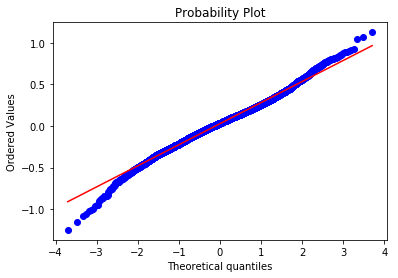

In [15]:
from sklearn.metrics import accuracy_score
import pylab 
import scipy.stats as stats
predictions = linreg_f.predict(X_ftest)
residuos = ytest-predictions
residuos
stats.probplot(residuos, dist="norm", plot= pylab)
pylab.show()

<h1>2. Selección de Atributos</h1>

Esta sección se enfoca en que "Selección de modelos" (Model Selection). En la sección anterior se pudo apreciar el peso respectivo al modelo de cada uno de los parámetros incluidos en el dataset <i>Houses Sales in King County</i>, esto obteniendo el Z-score de cada uno, lo que nos da una interpretación de la importancia del atributo en el modelo.

En particular el estimador utilizado en nuestro modelo de regresión, i.e. mínimos cuadrados, presenta un bajo bias y una alta varianza. La precisión de las predicciones pude ser mejorada eliminando ciertos parámetros del modelo, en particular se podrían establecer subconjuntos de atributos que presenten distintas precisiones entre ellos. De esta manera se trabaja con Model Selection.

Una técnica para realizar Model Selection es <b>Forward Stepwise Subset Selection</b>; la lógica de este método consiste en navegar el espacio posible de subconjuntos de parámetros, en particular se parte entrenando un modelo incorporando solo el <i>intercepto</i> y luego en cada iteración se repite el paso agregando el parámetro, cuyo ingreso represente un mejor ajuste del modelo, esto utilizando alguna métrica:
<ul>
<li>Error residual de mínimos cuadrados</li>
<li>Z-score</li>
<li>F-statistics</li>
</ul>

Al escoger un subconjunto de parámetros se genera un modelo que es interpretable y probablemente tiene un menor error de predicción que el modelo original. El problema recae en que al ser un proceso discreto, la eliminación o agregación de parámetros en general exibe gran varianza.

In [16]:
import matplotlib.pyplot as plt
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    xplot = []
    yplot = []
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "selected = %s ..."%names_x[best_candidate]
        xplot.append(len(indexes))
        yplot.append(best_new_score)
        print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
    plt.plot(xplot,yplot)
    plt.show()
    return selected

selected = grade ...
totalvars=2, mse = 0.143260
selected = lat ...
totalvars=3, mse = 0.103340
selected = sqft_living ...
totalvars=4, mse = 0.084960
selected = yr_built ...
totalvars=5, mse = 0.075447
selected = view ...
totalvars=6, mse = 0.071782
selected = sqft_living15 ...
totalvars=7, mse = 0.069979
selected = bathrooms ...
totalvars=8, mse = 0.068251
selected = condition ...
totalvars=9, mse = 0.066864
selected = waterfront ...
totalvars=10, mse = 0.065836
selected = floors ...
totalvars=11, mse = 0.065107
selected = sqft_lot ...
totalvars=12, mse = 0.064820
selected = yr_renovated ...
totalvars=13, mse = 0.064619
selected = bedrooms ...
totalvars=14, mse = 0.064583
selected = sqft_above ...
totalvars=15, mse = 0.064554
selected = sqft_lot15 ...
totalvars=16, mse = 0.064527
selected = long ...
totalvars=17, mse = 0.064516
selected = sqft_basement ...
totalvars=18, mse = 0.064516


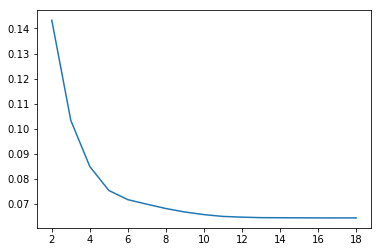

[17, 8, 13, 2, 11, 6, 15, 1, 7, 5, 4, 3, 12, 0, 9, 16, 14, 10]

In [17]:
df = pd.read_csv("kc_house_data.csv")
df.drop(['id','date','zipcode',],axis=1,inplace=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['price'] = np.log(df['price'])

import sklearn.linear_model as lm
X = df_scaled.iloc[:,1:]
N = X.shape[0] #Cantidad de filas
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['price']

mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara == 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]

Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

names_regressors = X.columns[:-1]
fss(Xm,ym,names_regressors)

<h1>3. Regularización</h1>

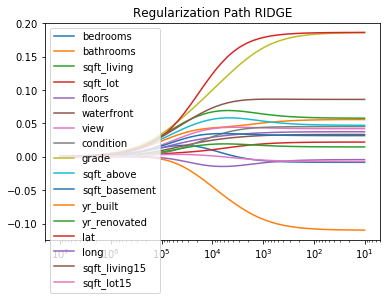

In [21]:
df = pd.read_csv("kc_house_data.csv")
df.drop(['id','date','zipcode',],axis=1,inplace=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['price'] = np.log(df['price'])

import sklearn.linear_model as lm
X = df_scaled.iloc[:,1:]
N = X.shape[0] #Cantidad de filas
X.insert(X.shape[1], 'intercept', np.ones(N))
X2 = X.drop('intercept', axis=1,inplace=False)
y = df_scaled['price']

mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara == 1

Xtrain = X2[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]

from sklearn.linear_model import Ridge
import matplotlib.pylab as plt

names_regressors = X2.columns
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

In [23]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(0,-3,base=10)
model = Lasso(fit_intercept=True)

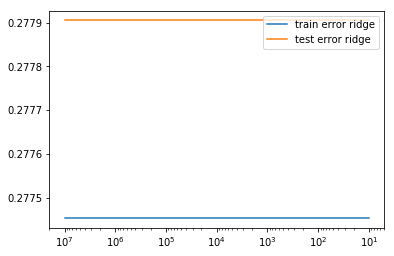

In [24]:
Xtest = X2[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

In [ ]:
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
best_cv_mse = float("inf")
model = #choose it
alphas_ = #alphas to evaluate
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) for train, val in kf.split(Xm)]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print "BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

<h1>4. Drift</h1>

In [ ]:
df_A = df_scaled.sample(1000,random_state=11)
frames = []
valor = df_scaled.price
length = 0.3
for z in np.arange(int(np.min(valor)),int(np.max(valor))+1,length):
    #un maximo de 100 datos por intervalo
    aux = df_scaled[(df_scaled.price >= z) & (df_scaled.price < z+length)].head(100)
    frames.append(aux)
df_B = pd.concat(frames).sample(1000,random_state=11) #crea el dataframe

In [ ]:
X_A = df_A.iloc[:,1:].values
y_A = df_A.price
X_B = df_B.iloc[:,1:].values
y_B = df_B.price
from sklearn.model_selection import train_test_split
Xtrain_A,Xval_A,ytrain_A,yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B,Xval_B,ytrain_B,yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)

b) Se observa que el *mse* del modelo **A** sobre el conjunto de validación **A** es menor que el *mse* del modelo **B** sobre el conjunto de validación **B**, cuando se calcula el *mse* del modelo **A** sobre **B** se tiene que el resultado es mayor al caso contrario cuando se calcula el *mse* de **B** sobre **A**

In [ ]:
linreg_A = lm.LinearRegression(fit_intercept = False)
linreg_B = lm.LinearRegression(fit_intercept = False)
linreg_A.fit(Xtrain_A, ytrain_A)
linreg_B.fit(Xtrain_B, ytrain_B)
pred_A = linreg_A.predict(Xval_A)
pred_B = linreg_B.predict(Xval_B)
mse_AA = mean_squared_error(pred_A, yval_A)
mse_AB = mean_squared_error(pred_A, yval_B)
mse_BB = mean_squared_error(pred_B, yval_B)
mse_BA = mean_squared_error(pred_B, yval_A)
print('R^2 A: {}'.format(linreg_A.score(Xval_A,yval_A)))
print('R^2 B: {}'.format(linreg_B.score(Xval_B,yval_B)))
print('mse_A :{}\nmse_AB:{}\nmse_B :{}\nmse_BA:{}\n'.format(mse_A, mse_AB, mse_B, mse_BA))

<h1>5. Detectar enfermedades cardiacas</h1>

En esta sección se debe realizar un preprocesamiento del dataset para que el modelo de Regresión Lineal se ajuste correctamente a los datos; en particular se deben crear nuevas columnas para todas las variables categóricas. Al realizar esto se asegura de que el modelo no considere estos valores como ordenados, es decir, si una variable posee 3 categorías codificads como {1,2,3}, hay que "explicarle" al modelo que tener un valor 1 no significa que sea menor que tener un valor 3, son solo valores categóricos distintos independientes entre ellos.

Por ejemplo, para la variable 'chest_pain' se crean 3 nuevas columnas en donde se codifica la presencia (con 0 y 1) de cada uno de los posibles valores en su dominio, por lo tanto queda claro que la variable 'chest_pain' posee 3 valores distintos.

Además de esto, y al igual que en la sección 1, se debe realizar una estandarización de los datos para asegurarnos de que nuestros valores reales se muevan en un espacio similar.

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope',\
           'vessel','thal','normal']

df = pd.read_csv("heart.dat", header=None, names=headers, sep=' ')
#df.head()

#Data standardization
df_scaled = pd.concat([df['age'],df['blood_p'],df['serum'],df['max_heart'],df['oldpeak'],df['slope'],df['vessel']],axis=1)
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)

#Dataframes with binary coded categorical variables
df_sex_dummies = pd.get_dummies(df['sex'], prefix='sex')
df_chest_pain_dummies = pd.get_dummies(df['chest_pain'], prefix='chest_pain')
df_electro_dummies = pd.get_dummies(df['electro'], prefix='electro')
df_thal_dummies = pd.get_dummies(df['thal'], prefix='thal')
df_categorical = pd.concat([df_sex_dummies,df_chest_pain_dummies, df_electro_dummies, df['blood_s'], df['angina'],df_thal_dummies], axis=1)

#Dataframe for coding categorical output
df_predict_dummies = pd.get_dummies(df['normal'], prefix='normal')
df_predict_dummies.drop(['normal_1'],axis=1,inplace=True)
df_predict_dummies.columns.values[0] = 'normal'

#Merging both dataframes with al preprocessed data
df = pd.concat([df_scaled,df_categorical, df_predict_dummies], axis=1)
df.head()

,age,blood_p,serum,max_heart,oldpeak,slope,vessel,sex_0.0,sex_1.0,chest_pain_1.0,...,chest_pain_4.0,electro_0.0,electro_1.0,electro_2.0,blood_s,angina,thal_3.0,thal_6.0,thal_7.0,normal
0,1.712094,-0.075410,1.402212,-1.759208,1.181012,0.676419,2.472682,0,1,0,...,1,0,0,1,0.0,0.0,1,0,0,1
1,1.382140,-0.916759,6.093004,0.446409,0.481153,0.676419,-0.711535,1,0,0,...,0,0,0,1,0.0,0.0,0,0,1,0
2,0.282294,-0.411950,0.219823,-0.375291,-0.656118,-0.954234,-0.711535,0,1,0,...,0,1,0,0,0.0,0.0,0,0,1,1
3,1.052186,-0.187590,0.258589,-1.932198,-0.743600,0.676419,0.349871,0,1,0,...,1,1,0,0,0.0,1.0,0,0,1,0
4,2.152032,-0.636310,0.374890,-1.240239,-0.743600,-0.954234,0.349871,1,0,0,...,0,0,0,1,0.0,1.0,1,0,0,0


In [60]:
import sklearn.linear_model as lm

y = df['normal']
df.drop(['normal'],axis=1,inplace=True)

X = df.iloc[:,:]
N = X.shape[0] #Cantidad de filas
X.insert(X.shape[1], 'intercept', np.ones(N))

#mascara estatica con el 70% de los datos
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara == 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]

linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)

y_hat = linreg.predict(Xtest)
y_hat_categorical = []
for val in y_hat:
    if val > 0.5:
        y_hat_categorical.append(1)
    else:
        y_hat_categorical.append(0)

#mse_matriz = np.power(y_outlier - y_predict_outlier, 2)
#mse_matriz = pd.DataFrame(mse_matriz)
#mse_matriz.describe()

ytest = ytest.tolist()

from sklearn.metrics import accuracy_score
print("Score: "+str(accuracy_score(ytest,y_hat_categorical)))

Score: 0.913580246914
